# CNN Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

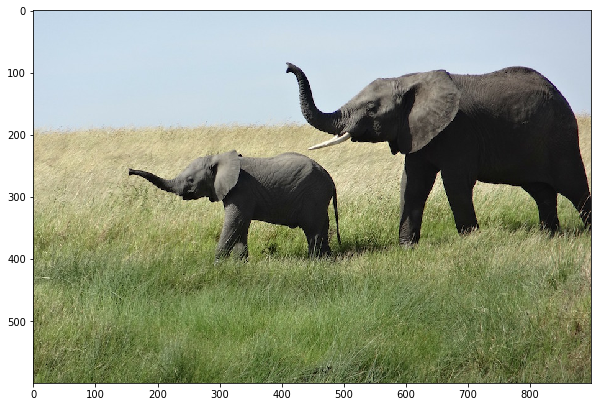

In [2]:
img = np.array(plt.imread('creative_commons_elephant.jpg'))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)

In [3]:
image = np.array(Image.fromarray(img).resize((224,224)), dtype='float32')

In [4]:
vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                    include_top=True)
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
y_image = vgg19.predict(np.expand_dims(image, axis=0))
tf.keras.applications.vgg19.decode_predictions(y_image, top=10)

[[('n02504458', 'African_elephant', 0.9423455),
  ('n01871265', 'tusker', 0.046533402),
  ('n02504013', 'Indian_elephant', 0.0110594),
  ('n02408429', 'water_buffalo', 3.169009e-05),
  ('n02437312', 'Arabian_camel', 1.5719932e-05),
  ('n02403003', 'ox', 7.67135e-06),
  ('n02397096', 'warthog', 2.9488242e-06),
  ('n01704323', 'triceratops', 1.0986234e-06),
  ('n02412080', 'ram', 8.561532e-07),
  ('n03868242', 'oxcart', 5.6229936e-07)]]

In [6]:
intermediate_layers = ['block1_conv2', 'block2_conv2', 'block3_conv4', 'block4_conv4', 'block5_conv4']

In [7]:
class IntermediateOutputsLayer(tf.keras.layers.Layer):
    
    def __init__(self, model, intermediate_layers):
        super().__init__()
        self.model = model
        self.intermediate_layers = intermediate_layers
      
    def call(self, inputs): 
        outputs = []
        y = inputs  
        for layer in self.model.layers:
            y = layer(y)          
            if layer.name in self.intermediate_layers:
                outputs.append(y)
        return outputs

In [8]:
class IntermediateOutputsModel(tf.keras.Model):
    
    def __init__(self, model, intermediate_layers):
        super().__init__()
        self.f = IntermediateOutputsLayer(model=model, intermediate_layers=intermediate_layers)
            
    def call(self, inputs): 
        y = self.f(inputs)
        return y

In [9]:
model = IntermediateOutputsModel(model=vgg19,
                                 intermediate_layers=intermediate_layers)

In [10]:
h_image = model.predict(np.expand_dims(image, axis=0))

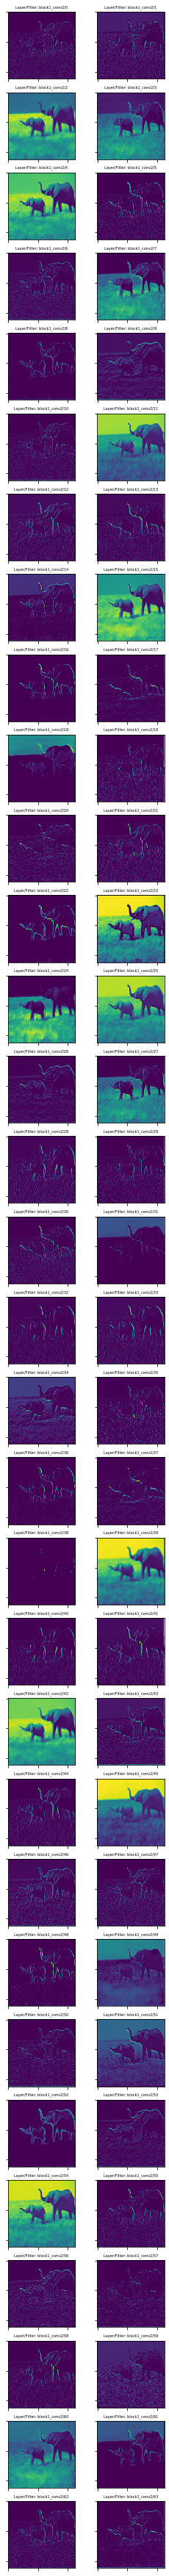

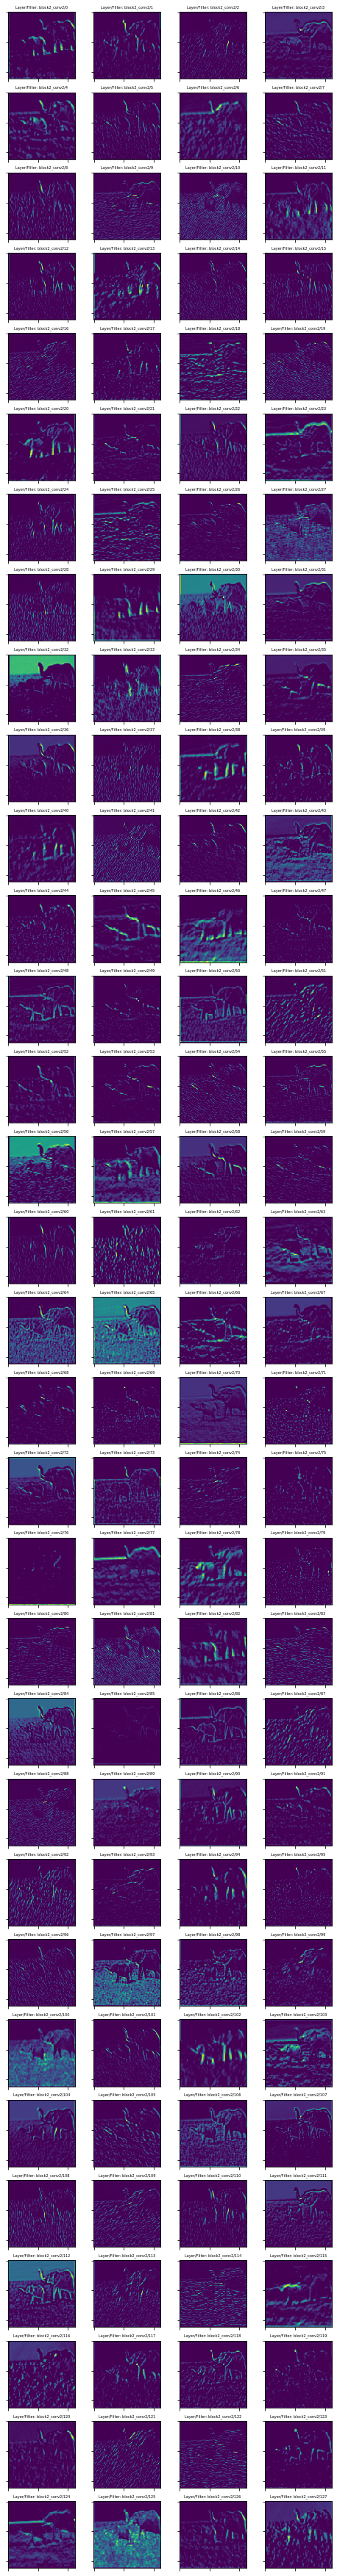

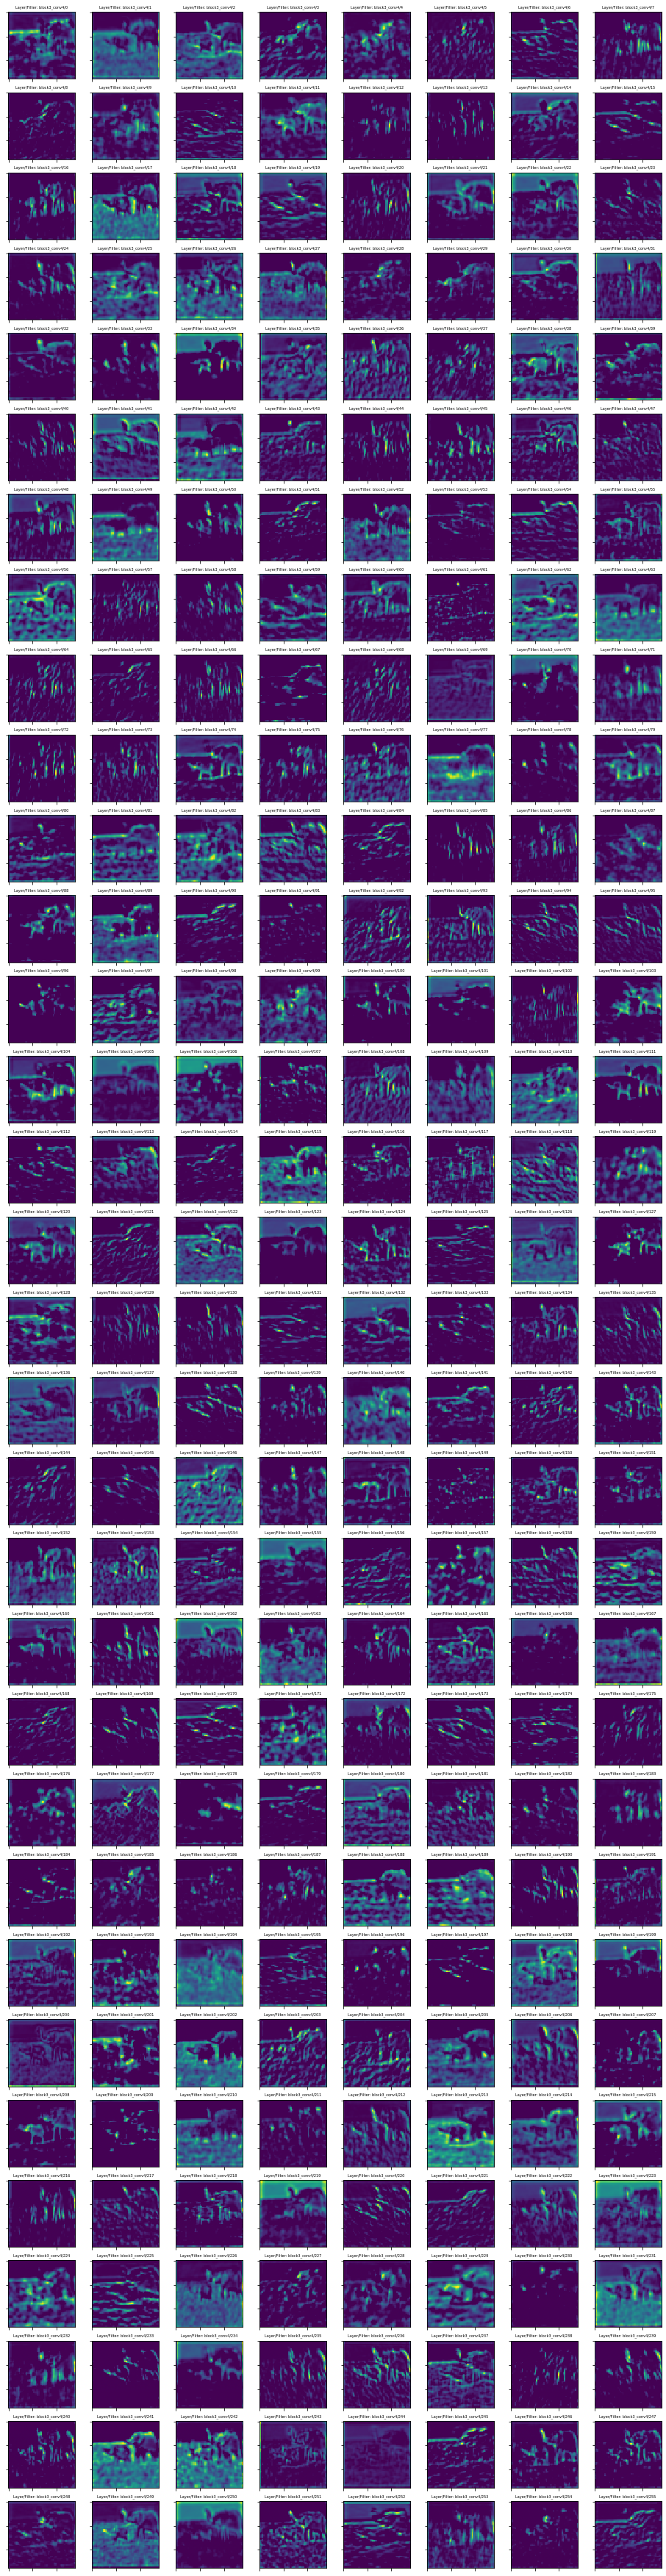

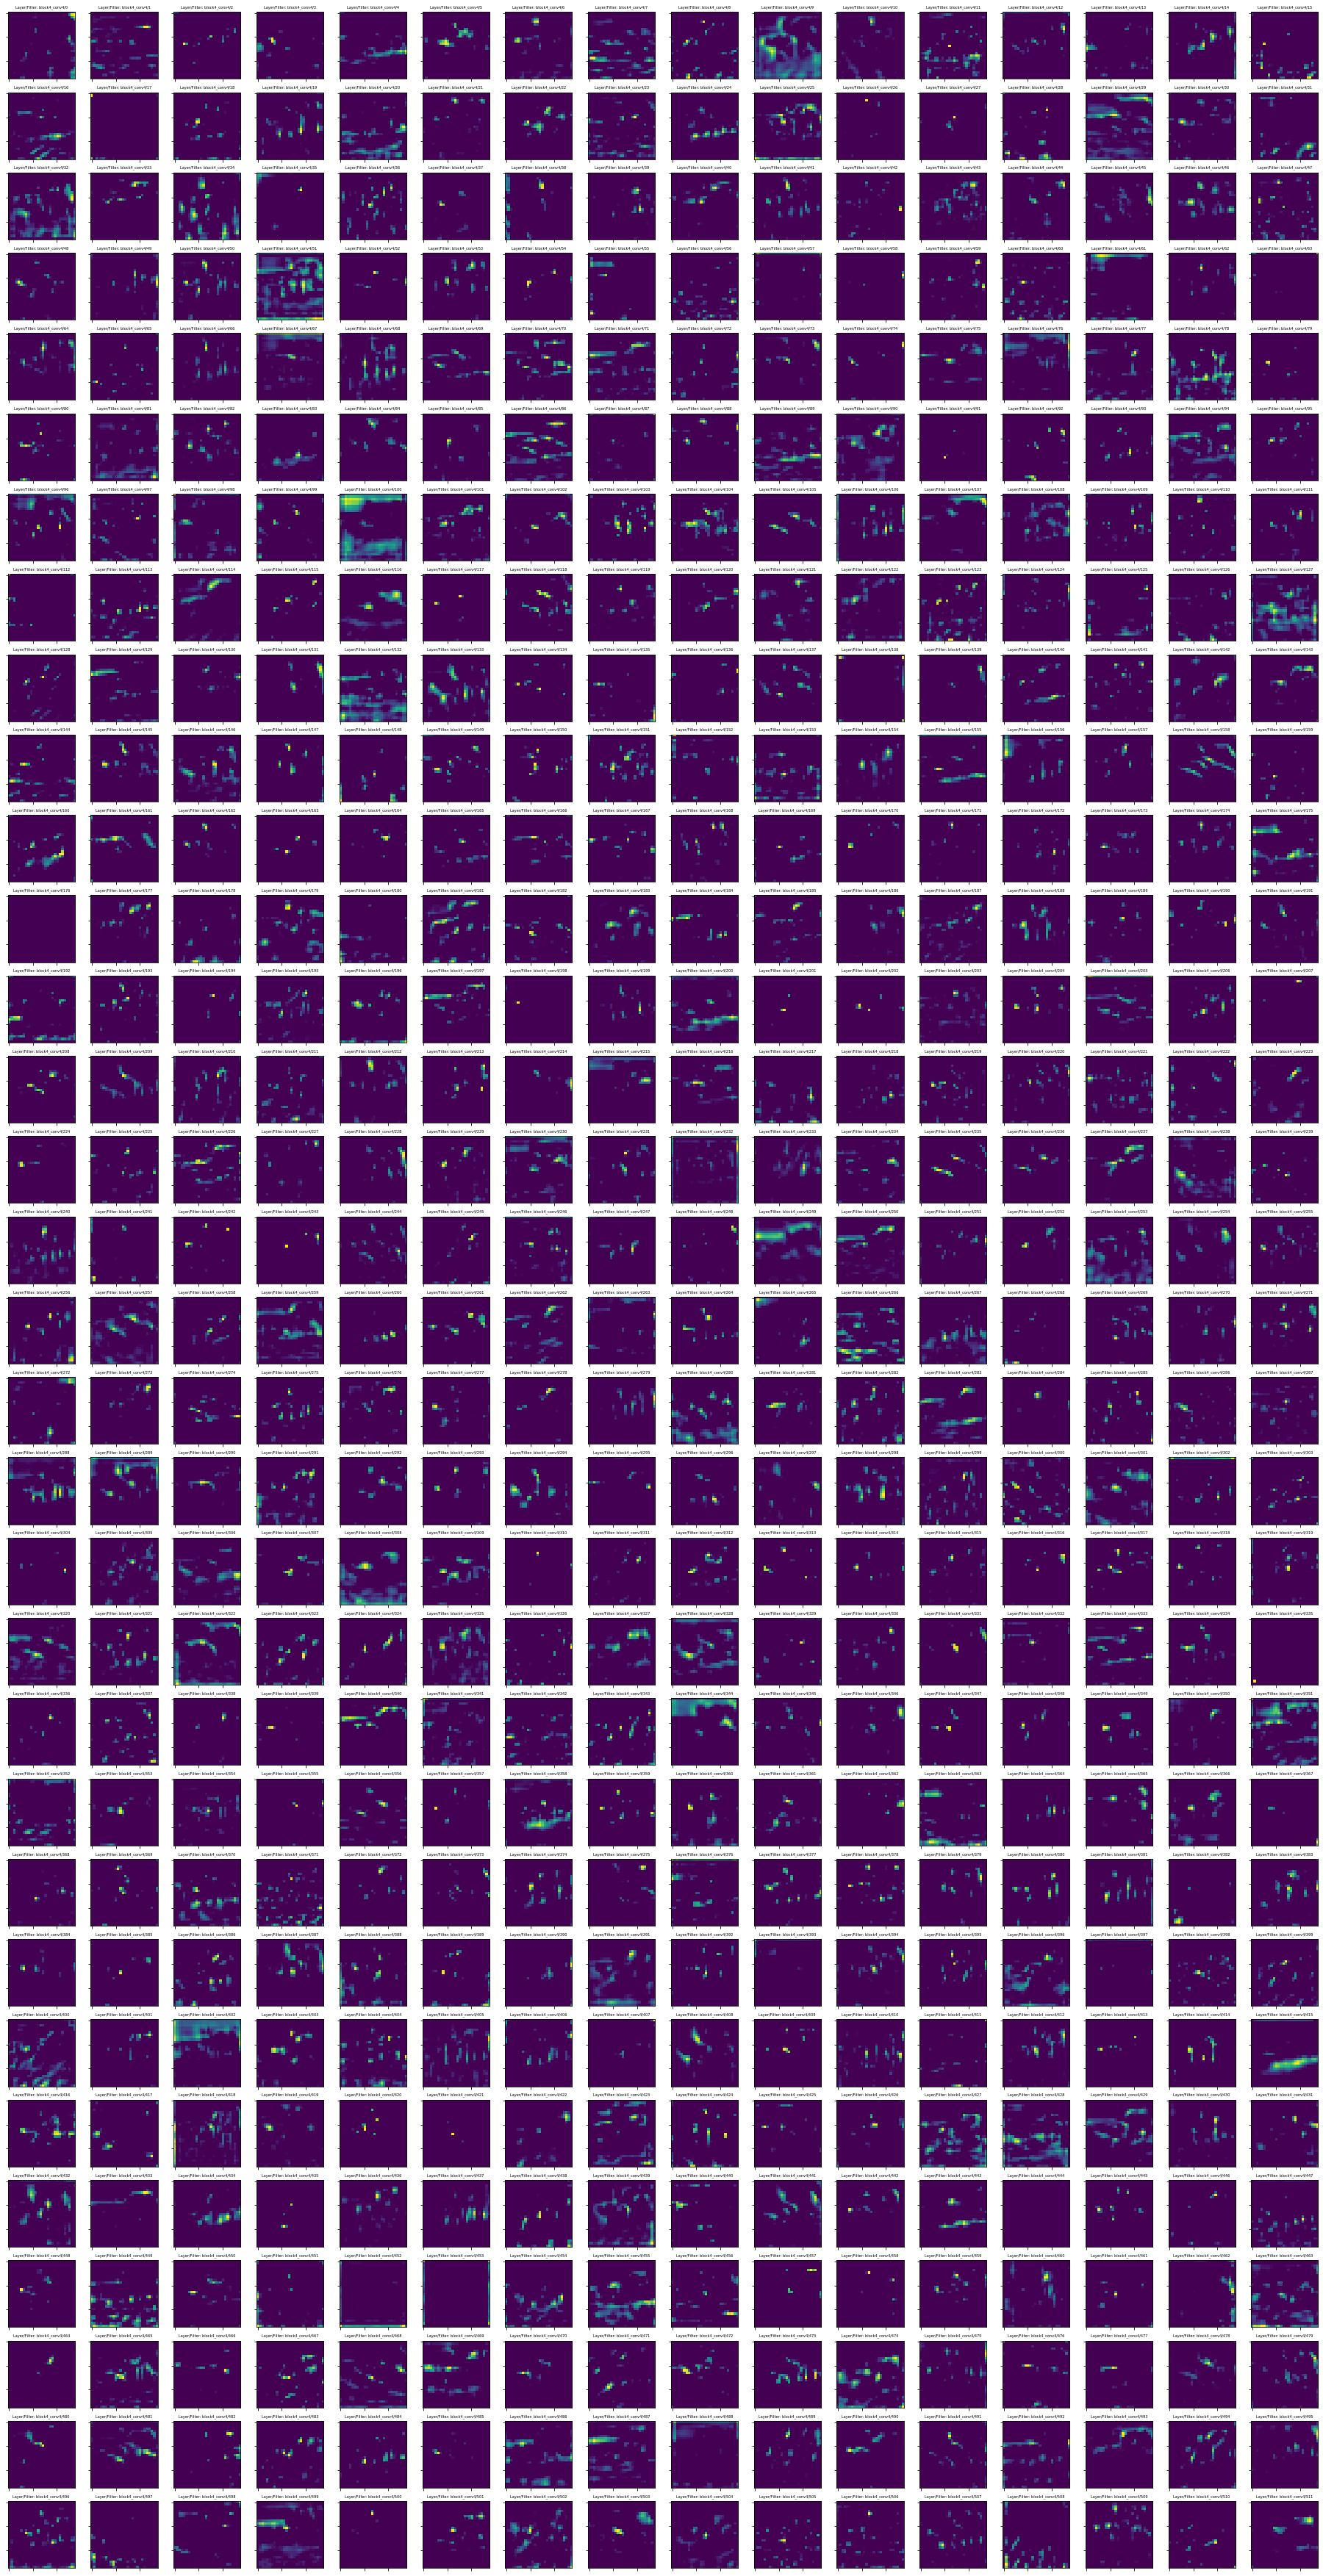

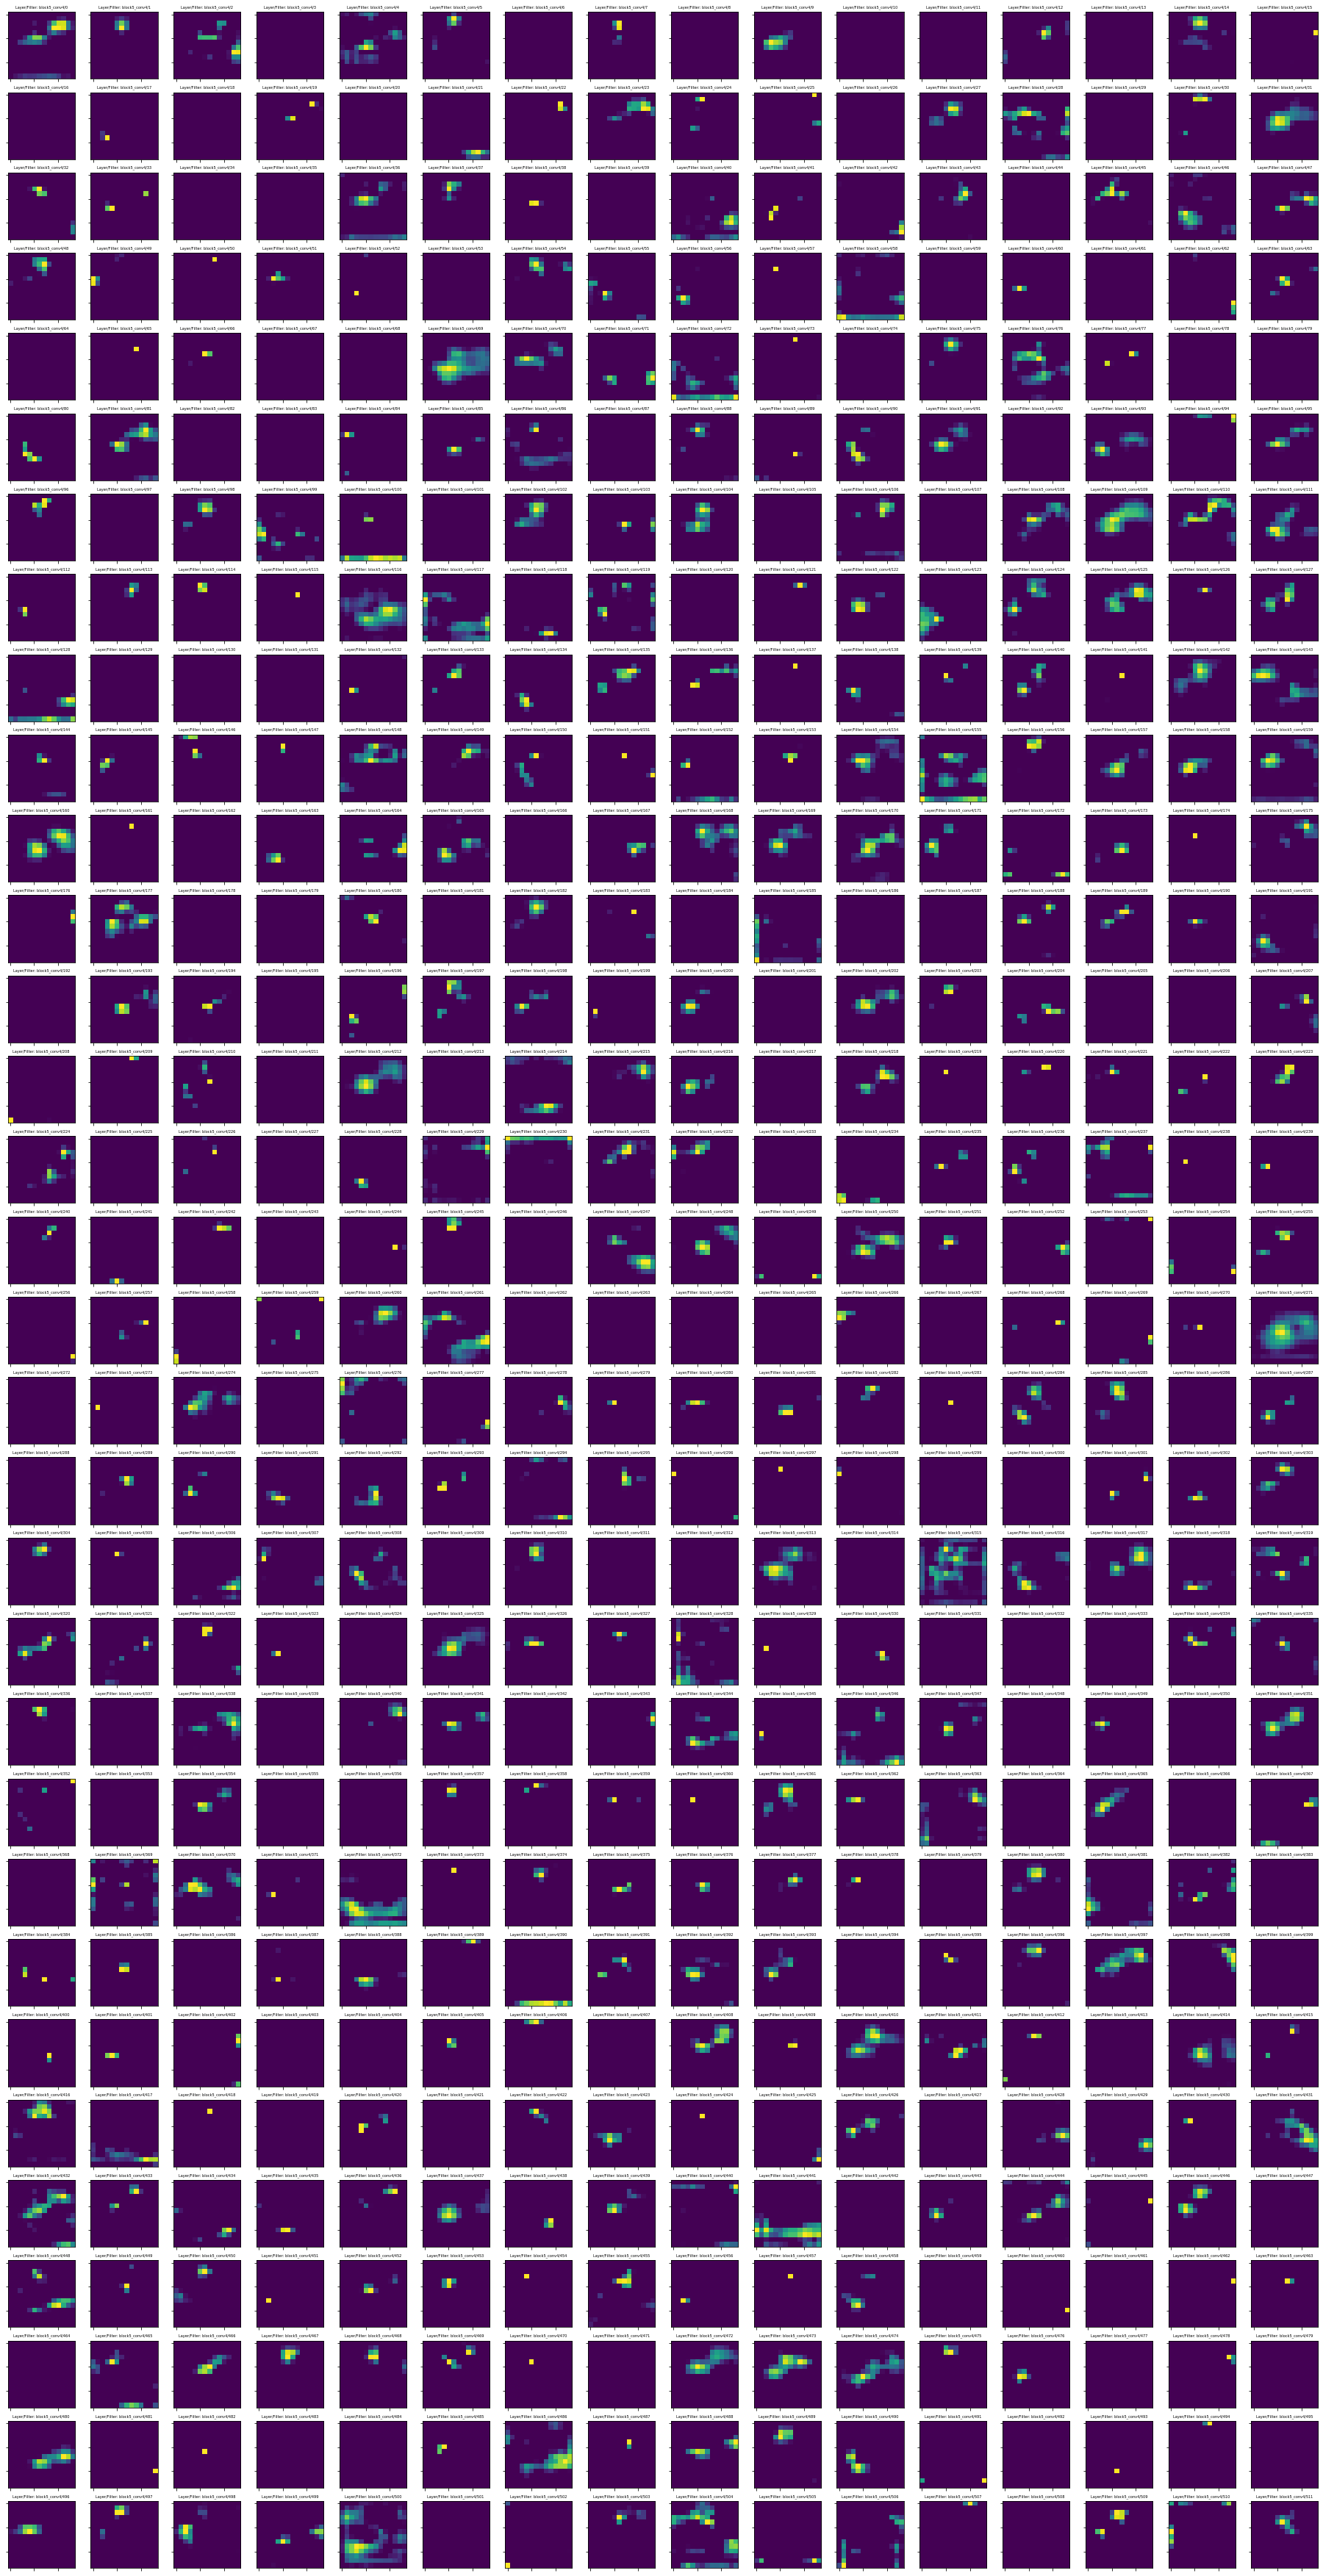

In [11]:
for l in range(len(intermediate_layers)):
    c = h_image[l].shape[-1]
    nrows = 32
    ncols = c//32
    fig, axes = plt.subplots(figsize=(2*ncols, 2*nrows), nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].set_title('Layer/Filter: {}/{}'.format(intermediate_layers[l],ncols*i+j), fontsize=5)
            axes[i,j].set_yticklabels([])
            axes[i,j].set_xticklabels([])
            img = np.squeeze(h_image[l], axis=0)[:,:,ncols*i+j]
            M = np.max(img)+0.01
            m = np.min(img)-0.01
            a = 255./(M-m)
            b = -a*m
            axes[i,j].imshow(np.floor(a*img+b))
    plt.show()